In [1]:
# genearte points
import numpy as np
mean1 = [1,2]
cov1 = [[1,0],[0,1]]
sample1 = np.random.RandomState(100).multivariate_normal(mean1,cov1,10000)
mean2 = [6,8]
cov2 = [[2,0],[0,2]]
sample2 = np.random.RandomState(150).multivariate_normal(mean2,cov2,10000)

In [2]:
sample1

array([[-0.74976547,  2.3426804 ],
       [ 2.1530358 ,  1.74756396],
       [ 1.98132079,  2.51421884],
       ...,
       [ 2.8359235 ,  1.75501206],
       [ 0.47799926,  0.55138998],
       [ 1.52602994,  1.75450184]])

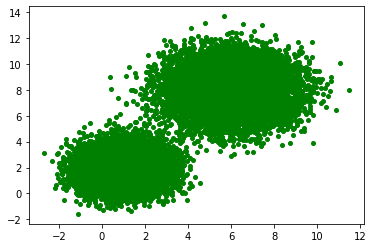

In [3]:
# visula representation
import matplotlib.pyplot as plt
plt.plot(sample1[:,0],sample1[:,1],'go', markersize =4)
plt.plot(sample2[:,0],sample2[:,1],'go', markersize =4)

In [4]:
# concatenate 2 samples
import numpy as np
sample = np.concatenate((sample1,sample2),axis=0)

In [5]:
sample1.shape
# sample2.shape
# sample.shape

(10000, 2)

In [6]:
#create DataFrame
dic = {'X':sample[:,0],'Y':sample[:,1]}
import pandas as pd
df = pd.DataFrame(dic)

In [7]:
df

,X,Y
0,-0.749765,2.342680
1,2.153036,1.747564
2,1.981321,2.514219
3,1.221180,0.929957
4,0.810504,2.255001
...,...,...
19995,5.643511,9.248806
19996,4.444755,9.356140
19997,5.793822,9.845057
19998,4.619623,8.666694


In [8]:
df.describe()

,X,Y
count,20000.000000,20000.000000
mean,3.498848,4.995217
std,2.778894,3.247418
min,-2.683425,-1.583107
25%,1.004813,1.985904
50%,3.051485,4.501773
75%,5.987912,7.998471
max,11.445955,13.679714


In [9]:
#based on min and max value randomly choose a centroid
centroid1 = [np.random.randint(-2.683425,11.445955),np.random.randint(-1.583107,13.679714)]
centroid2 = [np.random.randint(-2.683425,11.445955),np.random.randint(-1.583107,13.679714)]
print (centroid1, centroid2)

[-1, 12] [4, 6]


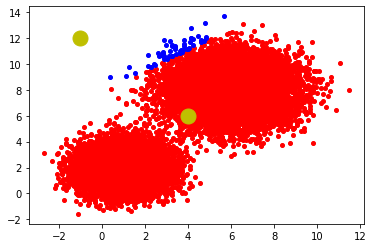

In [10]:
#iteration 1
# Determine distance from centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [11]:
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[3.35981615206152, 11.104317196841066] [3.4992380350937826, 3.4992380350937826]


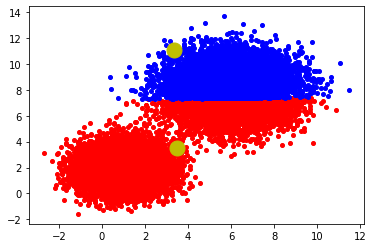

In [12]:
#iteration 2
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [13]:
#Iterarion 3
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[5.97618770331823, 8.76541652436537] [2.2387809755563617, 2.2387809755563617]


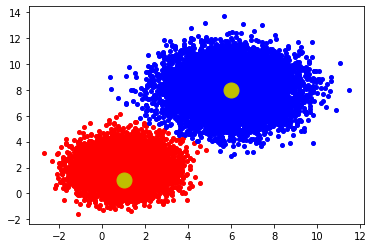

In [19]:
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [20]:
#Iterarion 4
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[5.993838260516585, 8.00210752626741] [1.0098378476214382, 1.0098378476214382]


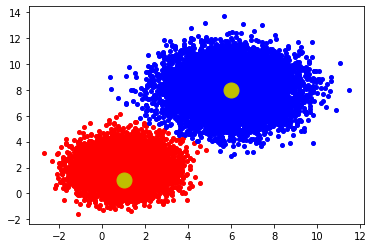

In [21]:
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [22]:
#Iterarion 5
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[5.993838260516585, 8.00210752626741] [1.0098378476214382, 1.0098378476214382]


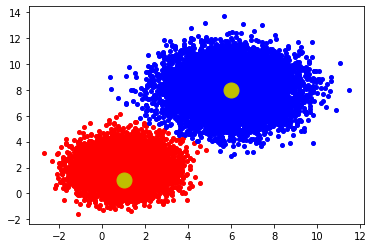

In [23]:
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

# Repeat with different random seeds

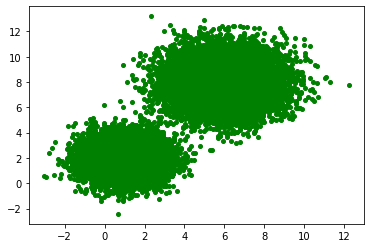

In [46]:
# genearte points
import numpy as np
mean1 = [1,2]
cov1 = [[1,0],[0,1]]
sample1 = np.random.RandomState(40).multivariate_normal(mean1,cov1,10000)
mean2 = [6,8]
cov2 = [[2,0],[0,2]]
sample2 = np.random.RandomState(60).multivariate_normal(mean2,cov2,10000)

# visula representation
import matplotlib.pyplot as plt
plt.plot(sample1[:,0],sample1[:,1],'go', markersize =4)
plt.plot(sample2[:,0],sample2[:,1],'go', markersize =4)



In [47]:
# concatenate 2 samples
import numpy as np
sample = np.concatenate((sample1,sample2),axis=0)

#create DataFrame
dic = {'X':sample[:,0],'Y':sample[:,1]}
import pandas as pd
df = pd.DataFrame(dic)




In [48]:
df.describe()

,X,Y
count,20000.000000,20000.000000
mean,3.487628,4.996095
std,2.784039,3.236713
min,-3.029454,-2.427749
25%,1.001858,2.004678
50%,3.058304,4.491032
75%,5.966427,7.992969
max,12.217072,13.206409


In [49]:
#based on min and max value randomly choose a centroid
centroid1 = [np.random.randint(-2.669997,11.445955),np.random.randint(-1.838710,13.679714)]
centroid2 = [np.random.randint(-2.669997,11.445955),np.random.randint(-1.838710,13.679714)]
print (centroid1, centroid2)


[4, 7] [2, 8]


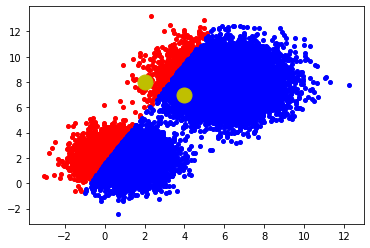

In [50]:
#iterarion 1
# Determine distance from centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [51]:
#Iterarion2
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[4.030139582460188, 5.247026397092983] [0.33581601371514, 0.33581601371514]


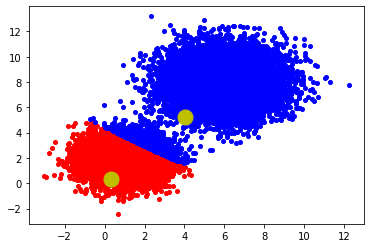

In [52]:
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

In [53]:
#Iterarion 3
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

[5.663149701549265, 7.619485365168907] [0.8844093717100688, 0.8844093717100688]


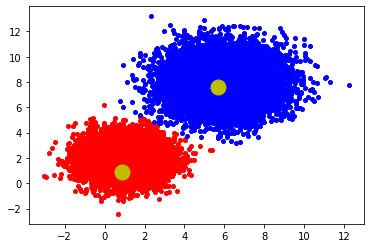

In [54]:
# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

[5.9823004889994795, 7.991858561705684] [0.990959307307785, 0.990959307307785]


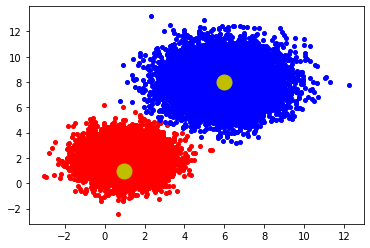

In [55]:
#Iterarion 4
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

# changing mean and covariances

In [34]:
# genearte points
import numpy as np
mean1 = [4,7]
cov1 = [[1,2],[2,6]]
sample1 = np.random.RandomState(100).multivariate_normal(mean1,cov1,10000)
mean2 = [16,18]
cov2 = [[3,4],[4,8]]
sample2 = np.random.RandomState(150).multivariate_normal(mean2,cov2,10000)

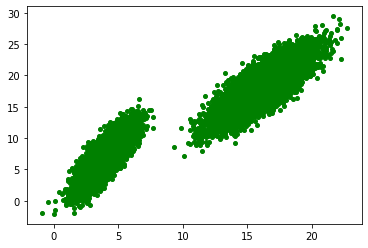

In [35]:
# visulazie representation
import matplotlib.pyplot as plt
plt.plot(sample1[:,0],sample1[:,1],'go', markersize =4)
plt.plot(sample2[:,0],sample2[:,1],'go', markersize =4)

In [36]:
# concatenate 2 samples
import numpy as np
sample = np.concatenate((sample1,sample2),axis=0)

#create DataFrame
dic = {'X':sample[:,0],'Y':sample[:,1]}
import pandas as pd
df = pd.DataFrame(dic)






In [37]:
df.describe()

,X,Y
count,20000.000000,20000.000000
mean,10.004711,12.499421
std,6.175201,6.126669
min,-0.891286,-2.085106
25%,4.006038,6.993296
50%,8.497833,12.160128
75%,15.994576,18.009166
max,22.669334,29.442730


In [38]:

#based on min and max value randomly choose a centroid
centroid1 = [np.random.randint(-0.891286,22.669334),np.random.randint(-2.085106,29.442730)]
centroid2 = [np.random.randint(-0.891286,22.669334),np.random.randint(-2.085106,29.442730)]
print (centroid1, centroid2)

[15, -1] [16, 1]


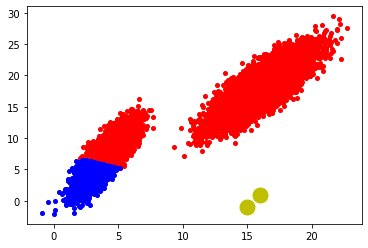

In [39]:
#iteration 1
# Determine distance from centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

[3.049559723049115, 4.340331039617316] [11.419679552111601, 11.419679552111601]


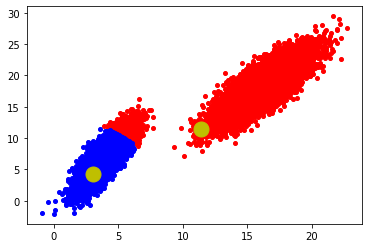

In [40]:
#Iterarion 2
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)



[3.8351575662289874, 6.553757892690548] [15.172080074093012, 15.172080074093012]


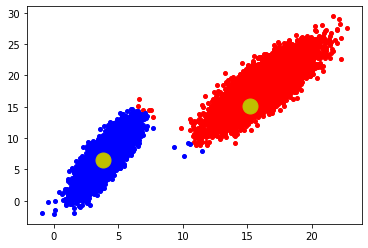

In [41]:
#Iterarion 3
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)

[3.9979085156247125, 6.974766402896825] [16.009110833928776, 16.009110833928776]


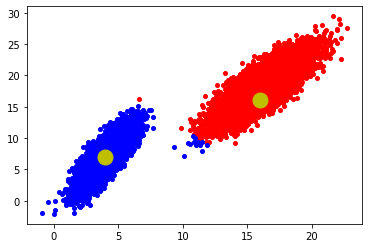

In [42]:
#Iterarion 4
#Re-assessing the Centroids
a1 = sum(df.X*df.r1)/sum(df.r1)
a2 = sum(df.X*df.r2)/sum(df.r2)
b1 = sum(df.Y*df.r1)/sum(df.r1)
b2 = sum(df.X*df.r2)/sum(df.r2)
centroid1 = [a1,b1]
centroid2 = [a2,b2]
print (centroid1, centroid2)

# Determine distance from 1st updated centroid

df['d1'] = np.sqrt((df.X-centroid1[0])**2 + (df.Y - centroid1[1])**2)
df['d2'] = np.sqrt((df.X-centroid2[0])**2 + (df.Y - centroid2[1])**2)

# Determing r - binary 
df['r1'] = df.apply(lambda r: 1 if r.d1<r.d2 else 0, axis=1)
df['r2'] = df.apply(lambda r: 1 if r.d1>r.d2 else 0, axis=1)

# Plotting
import matplotlib.pyplot as plt
plt.plot(df[df['r1'] == 0].X, df[df['r1'] == 0].Y,'ro',markersize =4)
plt.plot(df[df['r1'] == 1].X, df[df['r1'] == 1].Y,'bo',markersize =4)
plt.plot(centroid1[0],centroid1[1],'yo', markersize = 15)
plt.plot(centroid2[0],centroid2[1],'yo', markersize = 15)